In [1]:
from wgangp.db_utils import *
from acf_utils import *
from utility import *

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorf

In [15]:
run = 13
number = 10000
mpl.rcParams.update({'font.size': 22})

In [16]:
path = f'/scratch/scarpolini/lagrangian/wgangp/runs/{run}/{number}_gen.h5'
gen = load_model(path)
trajs = gen.predict(np.random.normal(0, 1, size=(50000, 100)))
np.save(f'wgangp/runs/{run}/gen_trajs_{number}', trajs)

W0705 13:06:05.960589 47690617576960 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [17]:
path = f'/scratch/scarpolini/lagrangian/wgangp/runs/{run}/gen_trajs_{number}.npy'
gen = np.load(path)

M = gen.max()
m = gen.min()
print('massimo, minimo: ',M,m)

#db = np.load('/scratch/scarpolini/databases/velocities.npy')[:,:,0]
#M = db.max() 
M = 10.273698864467972
#m = db.min()
m = -9.970374739869616
semidisp = (M-m)/2.
media = (M+m)/2.
gen = gen*semidisp + media
print('veri',M,m)
M = gen.max()
m = gen.min()
print('generati',M,m)

massimo, minimo:  0.7932296 -0.79251426
veri 10.273698864467972 -9.970374739869616
generati 8.180761 -7.8701963


# PDF V_x e A_x

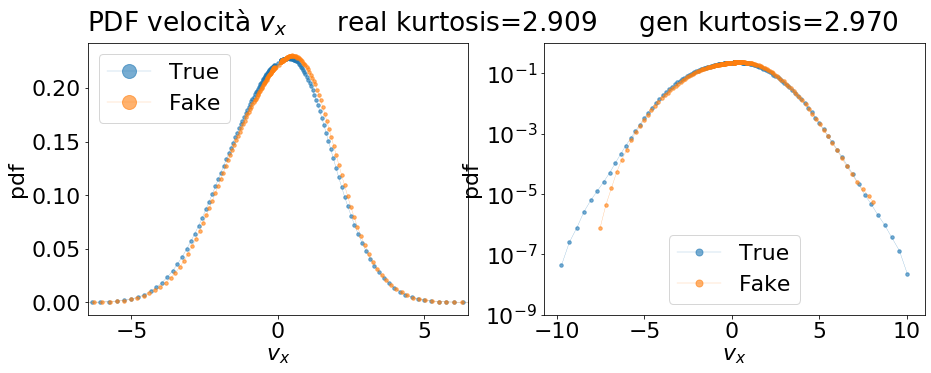

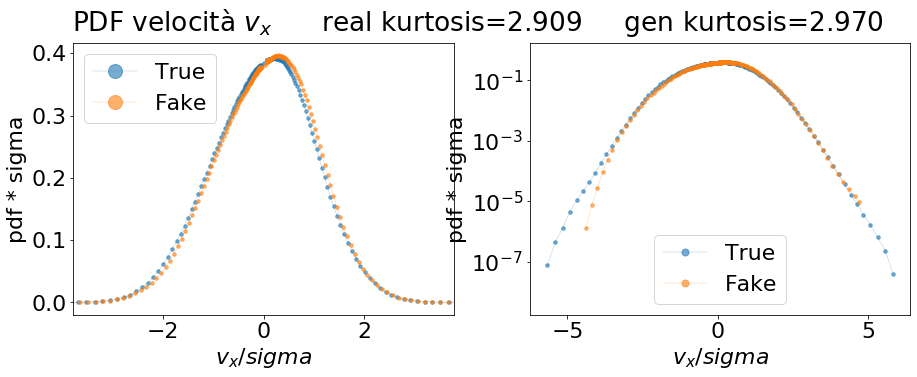

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))
hist, bin_edges = load_pdf('data/pdf_vx')
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
vel_std = 1.7192559430218903
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gen.min(),gen.max(),200,1e-1)
hist, bin_edges = np.histogram(gen.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.set_xlabel('$v_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-6.5,6.5])
ax1.legend(markerscale=4)
ax2.set_xlabel('$v_x$')
ax2.set_yscale('log')
ax2.set_ylim([1e-9,1])
ax2.set_ylabel('pdf')
ax2.legend(markerscale=2)

ax1n.set_xlabel('$v_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-6.5/vel_std,6.5/vel_std])
ax1n.legend(markerscale=4)
ax2n.set_xlabel('$v_x / sigma$')
ax2n.set_yscale('log')
ax2n.set_ylim([1e-9*vel_std,1*vel_std])
ax2n.set_ylabel('pdf * sigma')
ax2n.legend(markerscale=2)

fig.savefig(f'plots/gan_test_d0_{run}_{number}.png', fmt='png', dpi=100)
fign.savefig(f'plots/gan_test_d0_{run}_{number}_n.png', fmt='png', dpi=100)
fig.show()
fign.show()

In [19]:
gm = np.gradient(gen,axis=1)

1.0017092626771908
0.9976751961254735


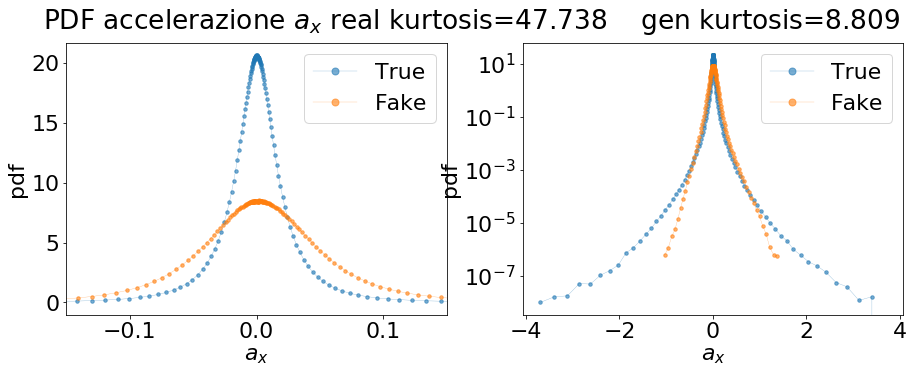

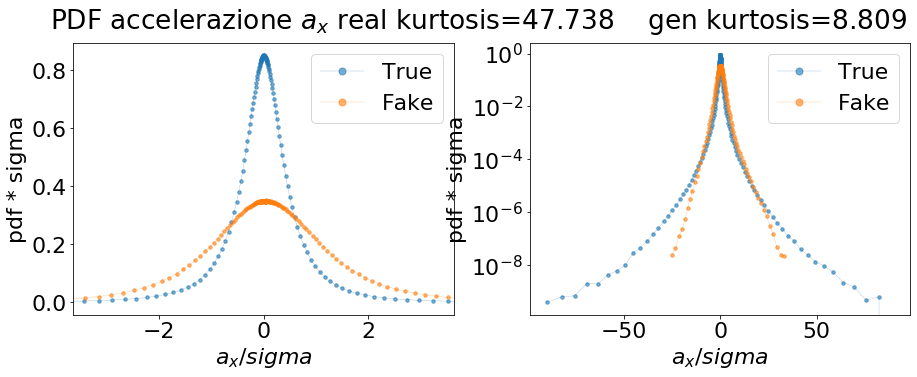

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_ax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
acc_std = 0.0412815564714219
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gm.min(),gm.max(),200,1e-3)
hist, bin_edges = np.histogram(gm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.legend(markerscale=2)
ax1.set_xlabel('$a_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.15,0.15])
ax2.legend(markerscale=2)
ax2.set_xlabel('$a_x$')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

ax1n.legend(markerscale=2)
ax1n.set_xlabel('$a_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.15/acc_std,0.15/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('$a_x / sigma$')
ax2n.set_ylabel('pdf * sigma')
ax2n.set_yscale('log')

fig.savefig(f'plots/gan_test_d1_{run}_{number}.png', fmt='png', dpi=100)
fign.savefig(f'plots/gan_test_d1_{run}_{number}_n.png', fmt='png', dpi=100)
fig.show()
fign.show()

# ACF_x

In [8]:
mean = np.load('../databases/velocities_acf_mean_and_std.npy')[0,:,0]
std = np.load('../databases/velocities_acf_mean_and_std.npy')[1,:,0]
plt.figure(figsize=(8,6))
l, caps, c = plt.errorbar(np.arange(2000), mean, std, lw=0, marker='^', errorevery=40,
                          ms=2, elinewidth=1, uplims=True, lolims=True, capsize=2, label='Real')
for cap in caps:
    cap.set_marker("_")

try: acfs = np.load(f'data/acf_x_gen_{run}_{number}.npy')
except:
    acfs = acf_gen_x(gen)
    np.save(f'data/acf_x_gen_{run}_{number}',acfs)
    
mean = acfs.mean(axis=0)
std = acfs.std(axis=0)
l, caps, c = plt.errorbar(np.arange(2000), mean, std, lw=0, marker='^', errorevery=40,
                          ms=2, elinewidth=1, uplims=True, lolims=True, capsize=2, label='Fake')
for cap in caps:
    cap.set_marker("_")

plt.title('funzione autocorrelazione particelle lagrangiane x')
plt.xlim([0,2000])
plt.xlabel('tau')
plt.legend()
plt.ylabel('autocorrelazione')
plt.savefig(f'plots/gan_test_acfx_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

E0705 13:04:54.685890 47690617576960 ultratb.py:155] Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "<ipython-input-8-1f9245b2559c>", line 9, in <module>
    try: acfs = np.load(f'data/acf_x_gen_{run}_{number}.npy')
  File "/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/numpy/lib/npyio.py", line 428, in load
    fid = open(os_fspath(file), "rb")
FileNotFoundError: [Errno 2] No such file or directory: 'data/acf_x_gen_13_20798.npy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-1f9245b2559c>", line 11, in <module>
    acfs = acf_gen_x(gen)
  File "/scratch/scarpolini/lagrangian/acf_utils.py", line 24, in acf_gen_x
    acfs[i,:,0] = acf(db[i,:,0])
  File "/scratch/scarpolini/lagrangian/acf_utils.py", line 9, in acf
    result[i] = result[i] / (len(result)-i) # normalizzazione in b

TypeError: must be str, not list

Error in callback <function flush_figures at 0x2b60f80a0378> (for post_execute):


KeyboardInterrupt: 

# ACF$_x$ accelerazione

In [ ]:
#mean = np.load('../databases/accelerations_acf_mean_and_std.npy')[0,:,0]
#std = np.load('../databases/accelerations_acf_mean_and_std.npy')[1,:,0]
#plt.figure(figsize=(8,6))
#l, caps, c = plt.errorbar(np.arange(2000), mean, std, lw=0, marker='^', errorevery=40,
#                          ms=2, elinewidth=1, uplims=True, lolims=True, capsize=2, label='Real')
#for cap in caps:
#    cap.set_marker("_")
#
try: acfs = np.load(f'data/acf_x_gen_{run}_{number}_acc.npy')
except:
    acfs = acf_gen_x(gm)
    np.save(f'data/acf_x_gen_{run}_{number}_acc',acfs)
    
mean = acfs.mean(axis=0)
std = acfs.std(axis=0)
l, caps, c = plt.errorbar(np.arange(2000), mean, std, lw=0, marker='^', errorevery=40,
                          ms=2, elinewidth=1, uplims=True, lolims=True, capsize=2, label='Fake')
for cap in caps:
    cap.set_marker("_")

plt.title('funzione autocorrelazione accelerazione lagrangiane x')
plt.xlim([0,2000])
plt.xlabel('tau')
plt.legend()
plt.ylabel('autocorrelazione')
plt.savefig(f'plots/gan_test_acfx_acc_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

# Exit time

In [ ]:
paths = [f'data/acf_x_gen_{run}_{number}.npy']
try: exit_times = np.load(f'data/exit_time_x_gen_{run}_{number}.npy')
except:
    exit_times = gen_exit_time(run, number, 0.5)
    np.save(f'data/exit_time_x_gen_{run}_{number}',exit_times)

In [ ]:
plt.figure(figsize=(5,5))
#exit_times = np.load('../databases/exit_time_0.50_lagrangian.npy')
#hist, bin_edges = np.histogram(exit_times,bins=100, density=True)
#print(save_pdf(bin_edges, hist, 'data/pdf_exit_time'))
hist, bin_edges = load_pdf('data/pdf_exit_time')
plt.plot(bin_edges, hist, alpha=0.6, label='True', marker='.', lw=0.3, ms=7)
hist, bin_edges = np.histogram(exit_times, bins=200, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
bin_edges = bin_edges[:-1]
plt.plot(bin_edges, hist, alpha=0.6, label='Fake', marker='.', lw=0.3, ms=7)
#plt.yscale('log')
plt.title('Exit time PDF')
plt.ylabel('pdf')
plt.xlabel('exit_time')
plt.xlim([0,750])
plt.legend()
plt.savefig(f'plots/gan_test_exit_time_{run}_{number}.png',fmt='png',dpi=100)

# Plot Traiettorie Generate e Reali

In [ ]:
db = np.load('../databases/velocities.npy')[:,:,0]

In [ ]:
idx1 = np.random.randint(0, db.shape[0], 2)
idx2 = np.random.randint(0, gen.shape[0], 2)
trajs = db[idx1]
gen_trajs = gen[idx2]
plt.figure(figsize=(11, 2*len(trajs)+2*len(gen_trajs)))
plt.title('esempi di velocità vere e generate')

for i, traj in enumerate(trajs):
    plt.subplot(len(trajs)+len(gen_trajs), 1, i+1)
    plt.plot(traj, color='red', label='real', lw=0, marker='.',ms=1)
    plt.legend(markerscale=7)

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(trajs)+len(gen_trajs), 1, i+1+len(trajs))
    plt.plot(traj, label='generated', lw=0, marker='.',ms=1)
    plt.legend(markerscale=7)

plt.tight_layout()
plt.savefig(f'plots/gan_test_trajs_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

In [ ]:
idx2 = np.random.randint(0, gen.shape[0],10)
gen_trajs = gen[idx2]
plt.figure(figsize=(11,2*len(gen_trajs)))
plt.suptitle('esempi di velocità generate')

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(gen_trajs), 1, i+1)
    plt.plot(traj, lw=0, marker='.',ms=1)

plt.tight_layout()
plt.savefig(f'plots/gan_test_gen_vel_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

gen_trajs = np.gradient(gen_trajs, axis=1)
plt.figure(figsize=(11,2*len(gen_trajs)))
plt.suptitle('esempi di accelerationi generate')

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(gen_trajs), 1, i+1)
    plt.plot(traj, lw=0, marker='.',ms=1)

plt.tight_layout()
plt.savefig(f'plots/gan_test_gen_acc_{run}_{number}.png', fmt='png', dpi=100)
plt.show()